<a href="https://colab.research.google.com/github/Gudiya2005/Customer_Churn_Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
from google.colab import files
uploaded = files.upload()

Saving Customer-Churn.csv to Customer-Churn (3).csv


In [118]:
import pandas as pd

#Load the dataset
df = pd.read_csv("Customer-Churn.csv")

#Display the first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [119]:
#Shape of dataset(rows, columns)
print("Shape of dataset:", df.shape)

#Check column types and non-null counts
df.info()

Shape of dataset: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBill

In [120]:
#View the first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [121]:
# Summary of numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [122]:
#Check if Totalcharges has blank strings
df["TotalCharges"].replace(" ", pd.NA, inplace=True)
df["TotalCharges"].isna().sum()

/tmp/ipython-input-122-1213788872.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].replace(" ", pd.NA, inplace=True)


np.int64(11)

In [123]:
# Check for object-type (categorical) columns
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical columns:\n", categorical_cols)

Categorical columns:
 Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [124]:
# Check how many unique values are in each categorical column
for col in categorical_cols:
  print(f"{col}: {df[col].nunique()} unique values")

customerID: 7043 unique values
gender: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
PhoneService: 2 unique values
MultipleLines: 3 unique values
InternetService: 3 unique values
OnlineSecurity: 3 unique values
OnlineBackup: 3 unique values
DeviceProtection: 3 unique values
TechSupport: 3 unique values
StreamingTV: 3 unique values
StreamingMovies: 3 unique values
Contract: 3 unique values
PaperlessBilling: 2 unique values
PaymentMethod: 4 unique values
TotalCharges: 6530 unique values
Churn: 2 unique values


In [125]:
# Drop customerID column
df.drop("customerID", axis=1, inplace=True)

In [126]:
# One-hot encode multi-category columns
multi_cat_cols = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                  'Contract','PaymentMethod']
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

In [127]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
PaperlessBilling,object
MonthlyCharges,float64
TotalCharges,object
Churn,object


In [128]:
#Convert TotalCharges from object to numeric
df["TotalCharges"].replace(" ", pd.NA, inplace=True)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

/tmp/ipython-input-128-3489025599.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].replace(" ", pd.NA, inplace=True)


In [129]:
# Check missing values again after encoding
print("Missing values:\n", df.isnull().sum().sort_values(ascending=False).head())

Missing values:
 TotalCharges     11
SeniorCitizen     0
gender            0
Dependents        0
tenure            0
dtype: int64


In [130]:
#Fill missing numeric values with mean
df = df.fillna(df.mean(numeric_only=True))

In [131]:
# Encode target variable
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [132]:
from sklearn.model_selection import train_test_split

#Split data into features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Encode features
X = pd.get_dummies(X, drop_first=True)

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
from sklearn.preprocessing import StandardScaler

#Initialize scaler
scaler = StandardScaler()

#Fit only on training data, then transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Create the model
model = LogisticRegression(max_iter=1000)

#Train the model
model.fit(X_train_scaled, y_train)

#Make predictions
y_pred_log = model.predict(X_test_scaled)

#Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

Accuracy: 0.8204400283889283

Confusion Matrix:
 [[934 102]
 [151 222]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

#Create the model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

#Train the model
rf_model.fit(X_train_scaled, y_train)

#Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

#Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.794180269694819

Confusion Matrix:
 [[953  83]
 [207 166]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.67      0.45      0.53       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [136]:
#XGBoost Model - Focused on Improving Recall

!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Initialize the model-give more weight to churn class(1)
model_xgb = XGBClassifier(scale_pos_weight=3, use_labels_encoder=False, eval_metric='logloss', random_state=42)

#Train the model
model_xgb.fit(X_train_scaled, y_train)

#Predict
y_pred_xgb = model_xgb.predict(X_test_scaled)

#Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


Accuracy: 0.7643718949609652

Confusion Matrix:
 [[819 217]
 [115 258]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      1036
           1       0.54      0.69      0.61       373

    accuracy                           0.76      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.76      0.77      1409



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:27:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_labels_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


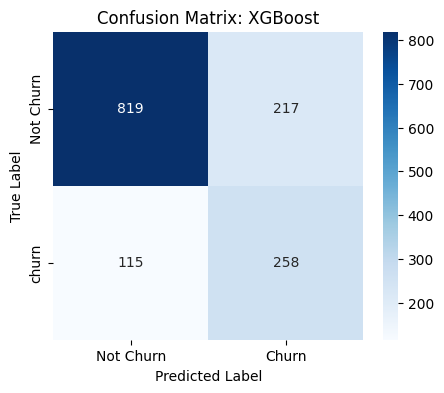

In [137]:
#Plot the confusion matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#Generate the confusionmatrix
cm = confusion_matrix(y_test, y_pred_xgb)

#Setup the plot size
plt.figure(figsize=(5,4))

#Plot the heatmap
sns.heatmap(cm,
            annot=True,          #Show numbers inside the boxes
            fmt='d',             #Format as integers
            cmap='Blues',        #Color scheme
            xticklabels=['Not Churn', 'Churn'],    #X-axis labels
            yticklabels=['Not Churn', 'churn'])     #Y-axis labels

#Addlabels and title
plt.xlabel('Predicted Label')         #Labels on x-axis
plt.ylabel('True Label')         #Labels on y-axis
plt.title('Confusion Matrix: XGBoost')        #Chart title

#Show the plot
plt.show()

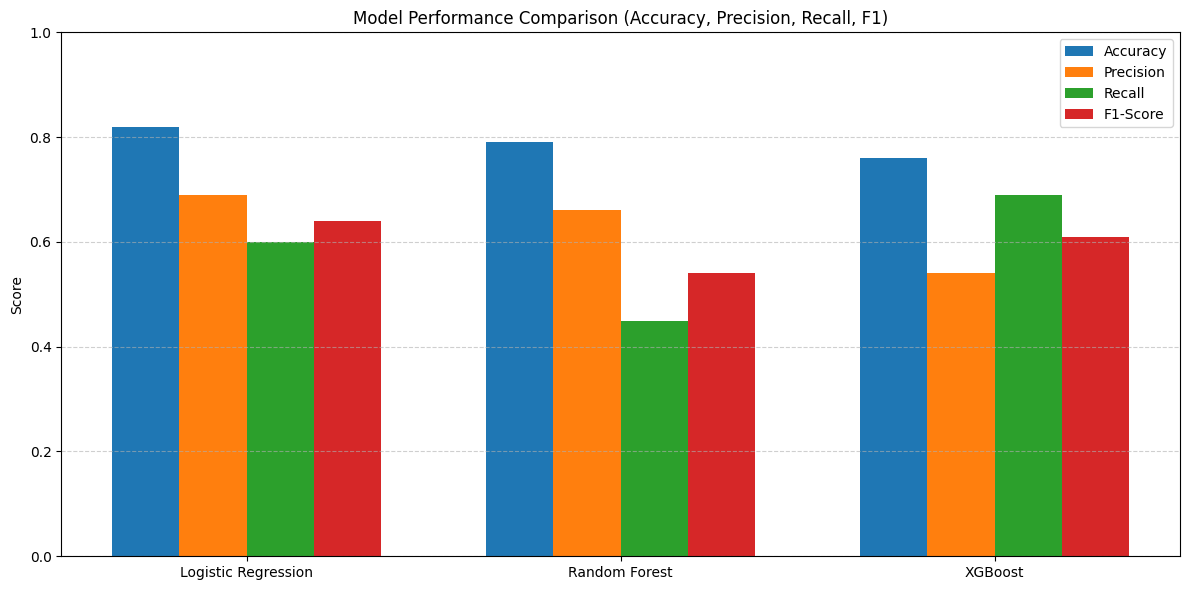

In [138]:
# Bar Chart

import matplotlib.pyplot as plt

#Models names
models = ['Logistic Regression', 'Random Forest', 'XGBoost']

#Accuracy scores
accuracy = [0.82, 0.79, 0.76]
precision = [0.69, 0.66, 0.54]
recall = [0.60, 0.45, 0.69]
f1_score = [0.64, 0.54, 0.61]

#Plotting grouped bars
bar_width = 0.18
x = range(len(models))
plt.figure(figsize=(12, 6))

plt.bar(x, accuracy, width=bar_width, label='Accuracy')
plt.bar([i + bar_width for i in x], precision, width=bar_width, label='Precision')
plt.bar([i + 2*bar_width for i in x], recall, width=bar_width, label='Recall')
plt.bar([i + 3*bar_width for i in x], f1_score, width=bar_width, label='F1-Score')

# Set x-axis labels in the center of grouped bars
plt.xticks([i + 1.5 * bar_width for i in x], models)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("Model Performance Comparison (Accuracy, Precision, Recall, F1)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [139]:
# XGBoost performed better than Logistic Regression and Random Forest
# Based on recall and F1-score, we proceed to fine-tune XGBoost.

In [140]:
#Hypertuning with GridSearchCV

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

#Define the parameter grid
Parm_grid = {
    'n_estimators': [100, 200],          # Number of boosting rounds (trees)
    'max_depth': [3, 5],                 # Maximum tree depth
    'learning_rate': [0.5, 0.1],         # Step size shrinkage
    'scale_pos_weight': [1, 2, 3]        # To handle class imbalance (higher = more weight to churners)
}

#Create the base model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

#Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=Parm_grid,
    scoring='recall',                    # Focus on catching as many churners as possible
    cv=3,                                # 3-fold cross-validation
    n_jobs=-1,                           # Use all CPU cores for parallel processing
    verbose=1                            # Show progress
)

#fit the model
grid_search.fit(X_train_scaled, y_train)

#Best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:27:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 3}


In [141]:
#Evaluate Best Model
best_model = grid_search.best_estimator_
y_pred_xgb = best_model.predict(X_test_scaled)

#Evaluate performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

Accuracy: 0.7530163236337828
Confusion Matrix:
 [[744 292]
 [ 56 317]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.72      0.81      1036
           1       0.52      0.85      0.65       373

    accuracy                           0.75      1409
   macro avg       0.73      0.78      0.73      1409
weighted avg       0.82      0.75      0.77      1409



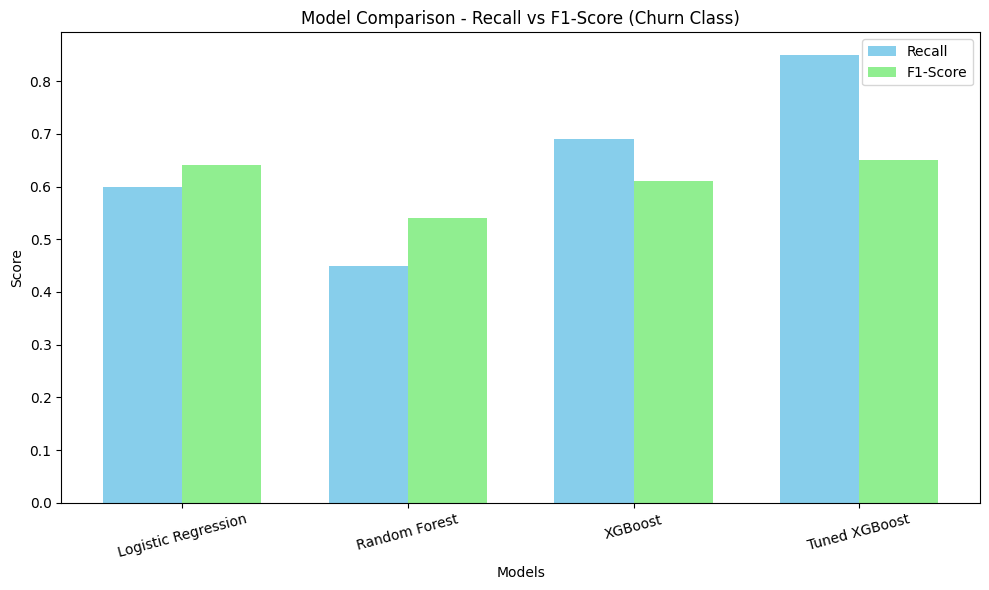

In [142]:
#Final Bar Chart

import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'Tuned XGBoost']

# Corresponding metrics
recall = [0.60, 0.45, 0.69, 0.85]
f1_score = [0.64, 0.54, 0.61, 0.65]

# Bar width
bar_width = 0.35
x = range(len(models))

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(x, recall, width=bar_width, label='Recall', color='skyblue')
plt.bar([p + bar_width for p in x], f1_score, width=bar_width, label='F1-Score', color='lightgreen')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Comparison - Recall vs F1-Score (Churn Class)')
plt.xticks([p + bar_width / 2 for p in x], models, rotation=15)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [145]:
import joblib

predict_churn = X_train.columns.tolist()  # Capture the columns
joblib.dump(predict_churn, 'predict_churn.pkl')  # Save to file

['predict_churn.pkl']

In [146]:
from google.colab import files
files.download('predict_churn.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Final Conclusion :

# """
# After evaluating Logistic Regression, Random Forest, and XGBoost models,
# we chose **Tuned XGBoost** as the final model for our Customer Churn Prediction project.

#  Goal: Predict customers who are likely to churn.

# Why XGBoost?
# - Highest **recall (85%)** — helps us correctly identify churners.
# - Balanced F1-Score (65%) — good trade-off between precision and recall.
# - Acceptable accuracy (75%) — despite slightly lower precision (52%).

#  This model helps businesses take early action to retain customers and reduce churn loss.
# """
